In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('Final_Train.csv')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
round(df.isnull().sum()/len(df)*100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

Experience column here we extracting the integer values from the string.

In [4]:
# Extract years of experience
df["Experience"] = df["Experience"].str.split()
df["Experience"] = df["Experience"].str[0].astype("int")

Next, the “Place” column can be easily processed by separating the City from the area.

In [5]:
# Extract cities
df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [6]:
# Seperate Ratings into bins
df["Rating"].fillna("-99%",inplace=True)
df["Rating"] = df["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df["Rating"] = pd.cut(df["Rating"],bins=bins,labels=labels,include_lowest=True)

Missing values were replaced with -99% to differentiate them. Then, assuming a rating of 91% has no significant difference as a rating of 99%, I grouped them into bins of size 10. Missing values will fall under class 0 while, 0-9% will be class 1, 10–19% will be class 2, so on and so forth

In [7]:
df['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [8]:
# Extract relevant qualification
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [9]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    df[title]=0
    
for x,y in zip(df["Qualification"].values,np.array([idx for idx in range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1
df.drop("Qualification",axis=1,inplace=True)

In [10]:
df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: City, dtype: int64

There is an ‘e’ entry  and it should have been a mistake

In [11]:
df.loc[df['City']=='e']

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
3980,23,0,e,Dentist,NaN,250,e,0,1,0,0,0,0,0,0,0,0


In [12]:
df["City"][3980] = "Unknown"
df["Place"][3980] = "Unknown"

In [13]:
df.iloc[3980]

Experience                                   23
Rating                                        0
Place                                   Unknown
Profile                                 Dentist
Miscellaneous_Info                          NaN
Fees                                        250
City                                    Unknown
MBBS                                          0
BDS                                           1
BAMS                                          0
BHMS                                          0
MD - Dermatology                              0
MS - ENT                                      0
Venereology & Leprosy                         0
MD - General Medicine                         0
Diploma in Otorhinolaryngology (DLO)          0
MD - Homeopathy                               0
Name: 3980, dtype: object

In [14]:

print(df['Miscellaneous_Info'])

0                    100% 16 Feedback Kakkanad, Ernakulam
1                   98% 76 Feedback Whitefield, Bangalore
2                                                     NaN
3       Bannerghatta Road, Bangalore ?250 Available on...
4                   100% 4 Feedback Keelkattalai, Chennai
                              ...                        
5956              98% 45 Feedback Basavanagudi, Bangalore
5957                                                  NaN
5958        97% 11 Feedback Greater Kailash Part 2, Delhi
5959    General Medical Consultation Viral Fever Treat...
5960    Acrylic Partial Denture Crowns and Bridges Fix...
Name: Miscellaneous_Info, Length: 5961, dtype: object


Taking into account the high percentage of missing values (43.95%), and the fact that I could not find any relevance of the column. Lets drop the column

In [15]:
df.drop("Miscellaneous_Info",axis=1,inplace=True)

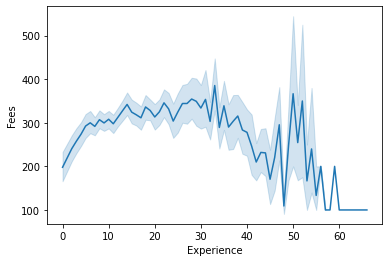

In [16]:
sns.lineplot(data=df,x='Experience',y='Fees')

Average fees increased with experience but peak at approximately 25 years of experience, then, average fees decreased with further increasing number of experience.

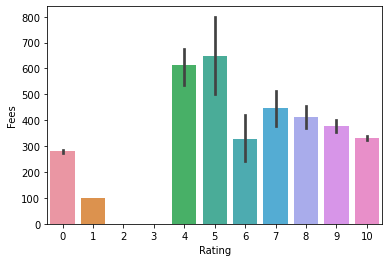

In [17]:
sns.barplot(data=df,x='Rating',y='Fees')

As you can see, a high rating does not correlate to a higher fee charged (in fact a lower fee might be the reason for high rating!), and the highest average fees charged were actually rated 30–60%. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

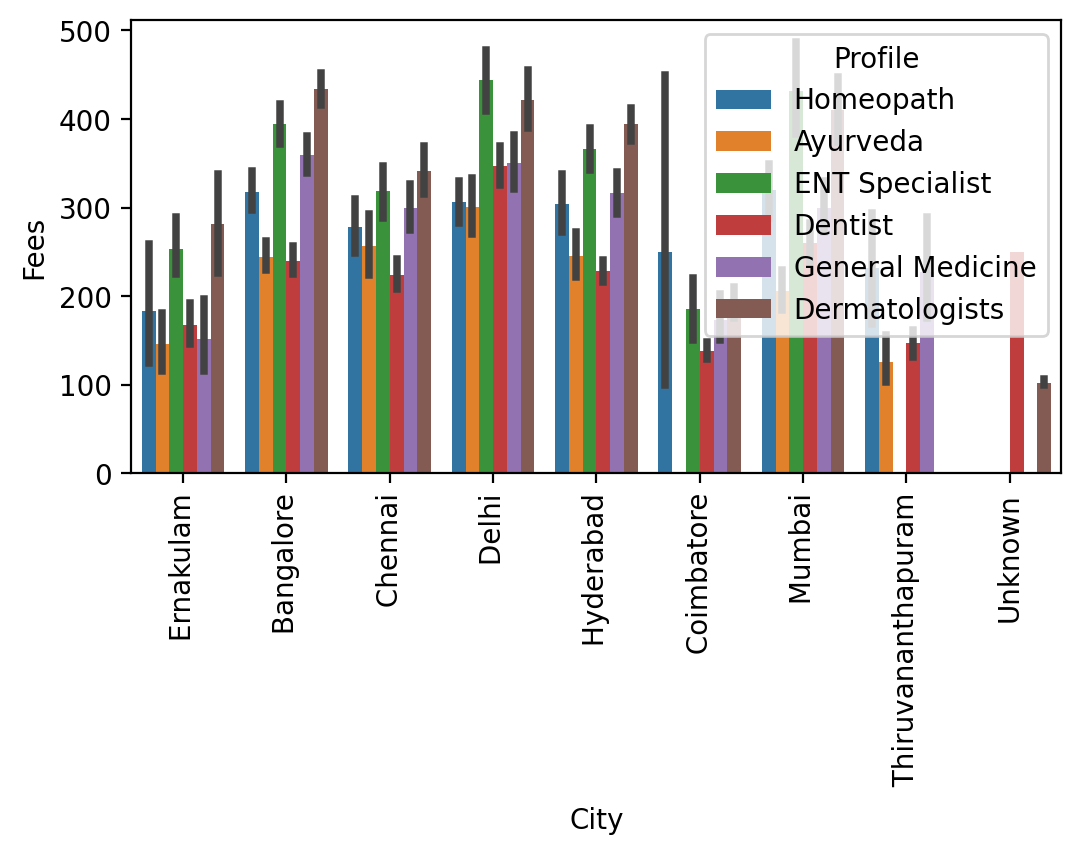

In [25]:
fig=plt.figure(figsize=(6,3),dpi=200)
sns.barplot(data=df,x='City',y='Fees',hue='Profile')
plt.xticks(rotation='vertical')



Fees charged by doctors differ between Cities

Distribution of the different doctor profile within each city is similar for most cities

All of the entries with unknown city are actually Dermatologist!

In [26]:
# Get dummies
df = pd.get_dummies(df,columns=["City","Profile"],prefix=["City","Profile"])

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [29]:
X = df.drop("Fees",axis=1)
y = df["Fees"]

# Encoding
enc = OrdinalEncoder()
X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [30]:
# support vector machine 
from sklearn.svm import SVR
m = SVR(gamma="scale")
m.fit(scaler.transform(X_train),y_train)

SVR()

In [31]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
# Prediction
y_pred = m.predict(scaler.transform(X_test))
score(y_pred,y_test)

0.7676659992931256

In [32]:
# Define own scorer
scorer = make_scorer(score,greater_is_better=True)
# Hyperparameter tunning
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg = GridSearchCV(m,param_grid=parameters,scoring=scorer,n_jobs=-1,cv=5)
reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(score))

In [33]:
y_pred_tuned = reg.predict(scaler.transform(X_test))
score(y_pred_tuned,y_test)

0.8015658590665287